In [36]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [37]:
api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ['2024-04-22-15-50-58']
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [38]:
data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)
df

100%|██████████| 9/9 [00:00<00:00, 33494.89it/s]


,_step,Self_Play/Total_Timesteps,Training/Learning_Rate,episodes,grad_steps,Self_Play/Mean_Timesteps,Evaluation/Entropies,Self_Play/Max_Return,Self_Play/Returns,Evaluation/Mean_Returns,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,29,78,0.001,180,290,13.000000,"{'_type': 'histogram', 'bins': [-0.49973928928...",-13,"{'bins': [-13.5, -13.484375, -13.46875, -13.45...",-13,...,0.3,1,identity,default,0.000001,PolicyPUCT,6,mvc,10,identity
1,29,90,0.001,180,290,15.000000,"{'bins': [-0.49351951479911804, -0.47789451479...",-15,"{'_type': 'histogram', 'bins': [-15.5, -15.484...",-15,...,0.3,1,identity,default,0.000001,PUCT,6,mvc,10,identity
2,29,168,0.001,180,290,28.000000,"{'_type': 'histogram', 'bins': [0.319425582885...",-22,"{'bins': [-37, -36.765625, -36.53125, -36.2968...",-100,...,0.3,1,identity,default,0.000001,PUCT,6,visit,10,identity
3,29,153,0.001,180,290,25.500000,"{'bins': [0.18009543418884277, 0.1957204341888...",-19,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-17,...,0.3,1,identity,default,0.000001,PUCT,6,visit,10,identity
4,29,180,0.001,180,290,30.000000,"{'_type': 'histogram', 'bins': [-0.08784970641...",-21,"{'bins': [-145, -143.0625, -141.125, -139.1875...",-15,...,0.3,1,identity,default,0.000001,PUCT,6,visit,10,identity
5,29,84,0.001,180,290,14.000000,"{'_type': 'histogram', 'bins': [-0.39307999610...",-13,"{'bins': [-15, -14.96875, -14.9375, -14.90625,...",-13,...,0.3,1,identity,default,0.000001,PolicyPUCT,6,mvc,10,identity
6,29,104,0.001,180,290,17.333333,"{'_type': 'histogram', 'bins': [-0.22039479017...",-15,"{'_type': 'histogram', 'bins': [-19, -18.9375,...",-15,...,0.3,1,identity,default,0.000001,PUCT,6,mvc,10,identity
7,29,162,0.001,180,290,27.000000,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-15,"{'_type': 'histogram', 'bins': [-33, -32.71875...",-13,...,0.3,1,identity,default,0.000001,PUCT,6,mvc,10,identity
8,29,81,0.001,180,290,13.500000,"{'_type': 'histogram', 'bins': [-0.49967667460...",-13,"{'bins': [-15, -14.96875, -14.9375, -14.90625,...",-13,...,0.3,1,identity,default,0.000001,PolicyPUCT,6,mvc,10,identity


In [39]:
df["Evaluation/Trajectories"]

0    [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
1    [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
2    [[60, 48, 36, 37, 38, 39, 40, 41, 29, 30, 31, ...
3    [[60, 48, 36, 24, 25, 26, 27, 28, 29, 30, 31, ...
4    [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
5    [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
6    [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ...
7    [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
8    [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ...
Name: Evaluation/Trajectories, dtype: object

In [40]:
df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
# group the data by policy combination and extract a dict trajo = {$policy_combination: trajectories} where trajectories is a merge of all the lists in the trajectories column for each group
# Step 1: Group the DataFrame by 'policy_combination'
grouped = df.groupby('policy_combination')['Evaluation/Trajectories']

# Step 2: Aggregate the trajectories lists within each group
aggregated_trajectories = grouped.sum()

# Step 3: Convert the aggregated groups to a dictionary
trajos = aggregated_trajectories.to_dict()
trajos

{'mvc+PUCT': [[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],
 'mvc+PolicyPUCT': [[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
  [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],
 'visit+PUCT': [[60,
   48,
   36,
   37,
   38,
   39,
   40,
   41,
   29,
   30,
   31,
   32,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,
   33,
   21,


In [41]:

trajectories = trajos["mvc+PolicyPUCT"]
trajectories

[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]]

In [42]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col

ncols, nrows = df["ncols"][0], 6
# trajectories is list of trajectories where each trajectory is list of states

visits = np.zeros((nrows, ncols), dtype = int)
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols = ncols)
        visits[row, col] += 1

visits

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [43]:
density = visits / visits.sum()
density

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308],
       [0.07692308, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

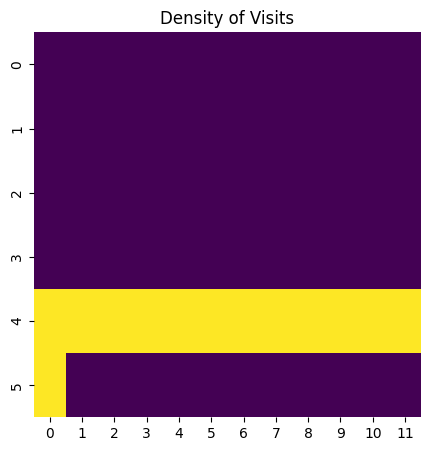

In [44]:
# render env heatmap with density
plt.figure(figsize=(5, 5))
# remove the numbers on x and y axis
sns.heatmap(density, annot=False, cmap="viridis", cbar=False)
plt.title("Density of Visits")
plt.show()

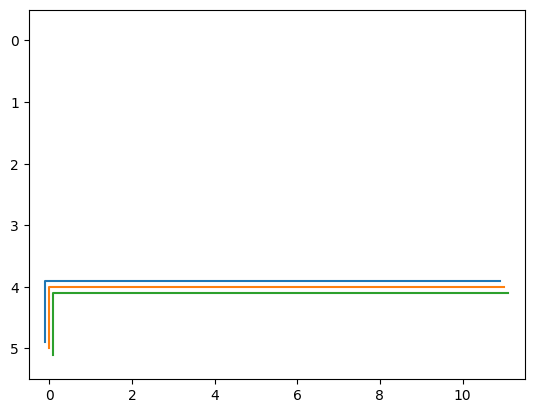

In [45]:
# Define offsets for each trajectory to reduce overlap
offsets = np.linspace(-0.1, 0.1, len(trajectories))

# Create a plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)

ax.invert_yaxis()  # Invert the y-axis so the top-left is (0,0)

# Plot each trajectory with offset
for idx, (trajectory, offset) in enumerate(zip(trajectories, offsets)):
    coords = [obs_to_cords(state, ncols) for state in trajectory]
    rows, cols = zip(*coords)
    # Apply the offset
    cols = [col + offset for col in cols]
    rows = [row + offset for row in rows]
    ax.plot(cols, rows, label=f'Trajectory {idx+1}')


plt.show()

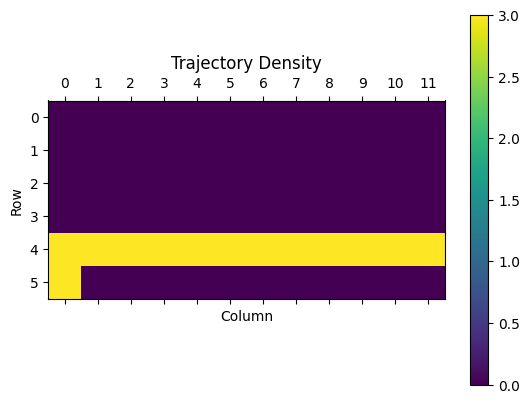

In [46]:
# Initialize the grid matrix
density = np.zeros((nrows, ncols))

# Increment the density for each state visited in each trajectory
for trajectory in trajectories:
    for state in trajectory:
        row, col = obs_to_cords(state, ncols)
        density[row, col] += 1

# Create a heatmap
fig, ax = plt.subplots()
cax = ax.matshow(density, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_xticklabels(range(ncols))
ax.set_yticklabels(range(nrows))
ax.set_xlabel('Column')
ax.set_ylabel('Row')
ax.set_title('Trajectory Density')

plt.show()

In [47]:
# plot heatmap of the density

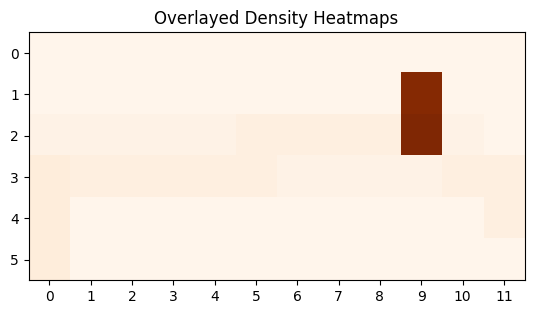

In [48]:
def calculate_density(trajectories, ncols, nrows):
    density = np.zeros((nrows, ncols))
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            density[row, col] += 1
    return density
fig, ax = plt.subplots()
alpha = 1.0  # Transparency level
cmaps = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys']
for trajectory_name in trajos.keys():
    trajectories = trajos[trajectory_name]
    density = calculate_density(trajectories, ncols, nrows)
    ax.imshow(density, cmap=cmaps.pop(), alpha=alpha)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))
ax.set_title('Overlayed Density Heatmaps')

plt.show()

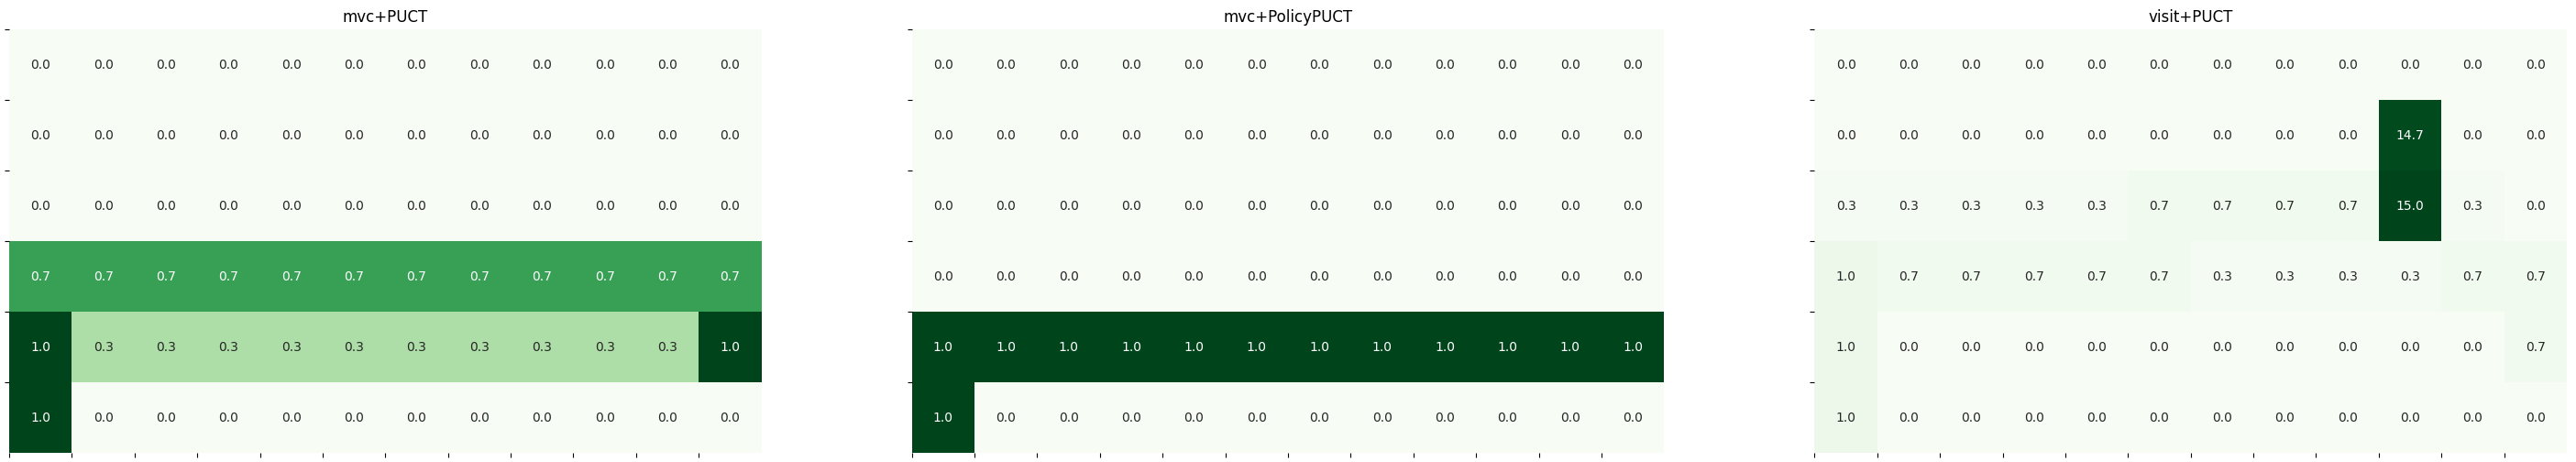

In [49]:
# create subplots where each subplot is a heatmap of the density of visits for a trajectory. use seaborn, matplotlib or any other library

heatmaps = len(trajos)

fig, axs = plt.subplots(1, heatmaps, figsize=(ncols*heatmaps, nrows))
for idx, (trajectory_name, trajectories) in enumerate(trajos.items()):
    density = calculate_density(trajectories, ncols, nrows) / len(trajectories)
    sns.heatmap(density, ax=axs[idx], cmap='Greens', cbar=False, annot=True, fmt='.1f')
    axs[idx].set_title(trajectory_name)
    axs[idx].set_xticks(range(ncols))
    axs[idx].set_yticks(range(nrows))

# save as svg
# plt.savefig('density_heatmaps.svg')

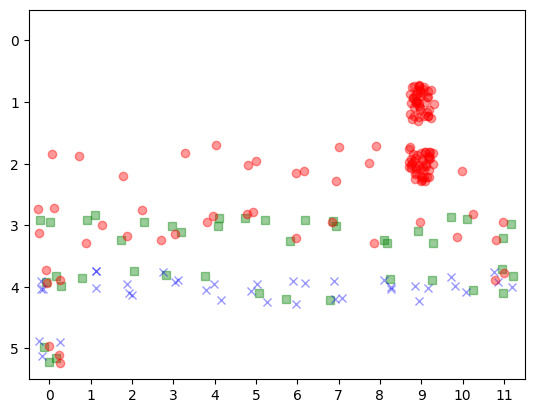

In [50]:
# Initialize the plot
fig, ax = plt.subplots()
ax.set_xlim(-0.5, ncols-0.5)
ax.set_ylim(-0.5, nrows-0.5)
ax.set_xticks(range(ncols))
ax.set_yticks(range(nrows))

# Function to plot trajectories
def plot_swarm(trajectories, color, marker):
    for trajectory in trajectories:
        for state in trajectory:
            row, col = obs_to_cords(state, ncols)
            # Random jitter within the cell to avoid overlap
            jitter = .3
            jitter_x = np.random.uniform(-jitter, jitter)
            jitter_y = np.random.uniform(-jitter, jitter)
            ax.plot(col + jitter_x, row + jitter_y, marker=marker, color=color, alpha=0.4)

colors = ['red', 'blue', 'green']
markers = ['o', 'x', 's']
for trajectory_name in trajos.keys():
    plot_swarm(trajos[trajectory_name], colors.pop(), markers.pop())

ax.invert_yaxis()  # Invert the y-axis to match the matrix indexing

plt.show()

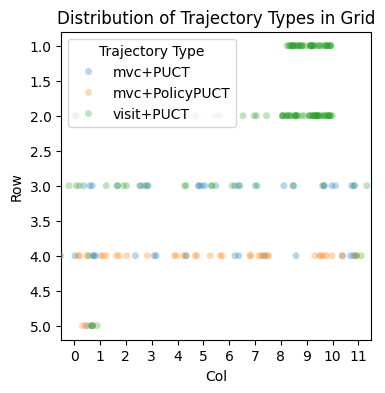

In [51]:
def obs_to_cords(state, ncols):
    row, col = divmod(state, ncols)
    return row, col


# Prepare DataFrame
data = []

for t_type, traj_list in trajos.items():
    for traj in traj_list:
        for state in traj:
            row, col = obs_to_cords(state, ncols)
            data.append({'Type': t_type, 'Row': row, 'Col': col})

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(4, 4))
sns.stripplot(data=df, x='Col', y='Row', hue='Type', jitter=1.0, dodge=False, marker='o', alpha=0.3)

plt.gca().invert_yaxis()  # Invert y-axis to align with typical matrix indexing
plt.legend(title='Trajectory Type')
plt.title('Distribution of Trajectory Types in Grid')
plt.show()